# Data Analysis Workshop

Workshop done in the summer between 2nd and 3rd year. Simple python analysis on a data file

In [ ]:
import pandas as pd

data = pd.read_csv('data(1).csv')

This code first loads the "flights" dataset using the load_dataset() function in Seaborn. It then reshapes the data into a pivot table using the pivot() function, with "month" as the row index, "year" as the column index, and "passengers" as the values.

Finally, it creates a heatmap of the pivot table using the heatmap() function, with the annot=True argument used to display the data values in each cell, and the fmt="d" argument used to format the values as integers.

The resulting heatmap displays the number of passengers who flew in each month and year, with darker colors indicating higher passenger numbers.

Other built-in data sets include :

-attention: This dataset contains reaction times for various tests of attention.

-brain_networks: This dataset contains functional connectivity between 14 regions of interest in the human brain.

-car_crashes: This dataset contains information about car crashes in the United States.

-diamonds: This dataset contains information about the prices and attributes of almost 54,000 diamonds.

-exercise: This dataset contains information about the results of a fitness test for different people.

-fmri: This dataset contains functional magnetic resonance imaging (fMRI) data from a single subject.

-mpg: This dataset contains information about fuel economy for various car models.

-planets: This dataset contains information about planets outside of our solar system.

-titanic: This dataset contains information about passengers on the Titanic, including whether they survived the sinking or not.


#### Q. Load one of the datasets above, print the data to see what it contains and plot something useful!

Finally, matplotlib can also produce animations. Here's an example of using Matplotlib's animation module to create a simple animation of a sine wave:

# Your turn!

Some things you could investigate:
1. Carry out the same analysis on another running distance, e.g. 100m  *
2. Are the fastest overall times each year increasing or decreasing? **
3. Which cities produce the most number of fast times? **
4. Which runners produce the most number of fastest times, and which countries do they come from? **
5. At what age do runners commonly set their fastest times? **
6. Make an animated plot showing the fastest times each year. ***
7. Do Olympic years produce the fastest times? ***


(* indicates the challenge level)

Investigating one of the datasets to provide analysis on a particular athelete running distance (100 m)

In [ ]:
import pandas as pd

data = pd.read_csv('data(1).csv')

In [ ]:
data.head()

,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event
0,1,00:01:40.910000,David Rudisha,KEN,1988-12-17,1.0,London,2012-09-08,Men,800 m
1,2,00:01:41.010000,David Rudisha,KEN,1988-12-17,1.0,Rieti,2010-08-29,Men,800 m
2,3,00:01:41.090000,David Rudisha,KEN,1988-12-17,1.0,Berlin,2010-08-22,Men,800 m
3,4,00:01:41.110000,Wilson Kipketer,DEN,1970-12-12,1.0,Köln,1997-08-24,Men,800 m
4,5,00:01:41.240000,Wilson Kipketer,DEN,1970-12-12,1.0,Zürich,1997-08-13,Men,800 m


The table printed above shows all the data values for the file data

In [ ]:
data.dtypes

Rank               int64
Time              object
Name              object
Country           object
Date of Birth     object
Place            float64
City              object
Date              object
Gender            object
Event             object
dtype: object

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)
data['Date of Birth'] = pd.to_datetime(data['Date of Birth'])
data['Time']= pd.to_timedelta(data['Time']).dt.total_seconds()

#where dt.total_seconds displays the total time duration

The 100 m events are being filtered out

In [ ]:
data[data.Event == '100 m'].head()

,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event
4000,1,10.49,Florence Griffith-Joyner,USA,1959-12-21,1.0,Indianapolis,1988-07-16,Women,100 m
4001,2,10.61,Florence Griffith-Joyner,USA,1959-12-21,1.0,Indianapolis,1988-07-17,Women,100 m
4002,3,10.62,Florence Griffith-Joyner,USA,1959-12-21,1.0,Seoul,1988-09-24,Women,100 m
4003,4,10.64,Carmelita Jeter,USA,1979-11-24,1.0,Shanghai,2009-09-20,Women,100 m
4004,5,10.65,Marion Jones,USA,1975-10-12,1.0,Johannesburg,1998-09-12,Women,100 m


The table above has filtered out the 100 m events for both genders

In [ ]:
medals_m = data[data.Event == '100 m'].loc[data.Place <= 3.0].groupby(['Country'], as_index=False).size()
print(medals_m)

   Country  size
0      AHO     4
1      ANT     9
2      AUS     1
3      BAH    44
4      BAR     6
5      BLR     5
6      BRA     1
7      BUL    19
8      CAN    35
9      CAY     1
10     CHN     7
11     CIV    25
12     CMR     2
13     CUB     1
14     ECU     1
15     FRA    50
16     FRG     1
17     GBR    32
18     GDR    52
19     GER    31
20     GHA     9
21     GRE    18
22     ITA     1
23     JAM   522
24     JPN     3
25     NAM    27
26     NED    17
27     NGR    55
28     NOR     1
29     POL     2
30     POR     5
31     QAT    11
32     RSA    19
33     RUS    29
34     SKN    19
35     TTO   102
36     TUR     2
37     UKR    33
38     USA   799
39     ZAM     1
40     ZIM     3


In [ ]:
X = medals_m['size'].idxmax()

Y = medals_m['Country'][X]

Z = medals_m['size'][X]
print("The country with the highest number of medals,", Z, ", is", Y)

The country with the highest number of medals, 799 , is USA


In [ ]:
# Performances in the 100 m event
get_year = data[data.Event == '100 m']['Date'].dt.year

# Number of performances per year
get_year_perf = get_year.value_counts()
get_year_perf.head()

2015    190
2016    152
2012    138
2013    131
2008    109
Name: Date, dtype: int64

The plot shows the increase in the number of performances per year

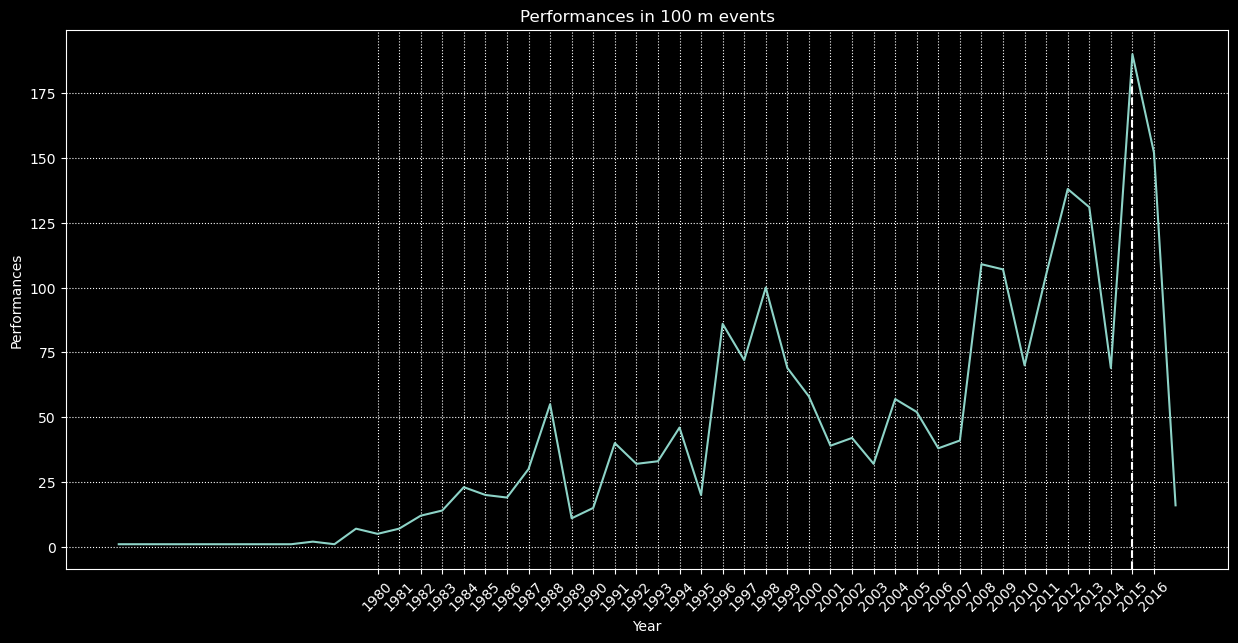

In [ ]:
def performance():
    get_year_perf.sort_index().plot(figsize=(15, 7))
    plt.title('Performances in 100 m events')
    plt.xlabel('Year')
    plt.ylabel('Performances')
    plt.grid(ls = 'dotted')
    plt.style.use('dark_background')
    plt.xticks(range(1980,2017),rotation=45)
    plt.axvline(get_year_perf.idxmax(), ls='dashed',ymax=1/1.1)
    plt.show()
performance()

In [ ]:
def get_age():
    data['Age'] = round((data['Date']-data['Date of Birth']).dt.days/365,1)
    return data

get_age().head()

#where .head() returns the first 5 data sets

,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event,Age
0,1,100.91,David Rudisha,KEN,1988-12-17,1.0,London,2012-09-08,Men,800 m,23.7
1,2,101.01,David Rudisha,KEN,1988-12-17,1.0,Rieti,2010-08-29,Men,800 m,21.7
2,3,101.09,David Rudisha,KEN,1988-12-17,1.0,Berlin,2010-08-22,Men,800 m,21.7
3,4,101.11,Wilson Kipketer,DEN,1970-12-12,1.0,Köln,1997-08-24,Men,800 m,26.7
4,5,101.24,Wilson Kipketer,DEN,1970-12-12,1.0,Zürich,1997-08-13,Men,800 m,26.7


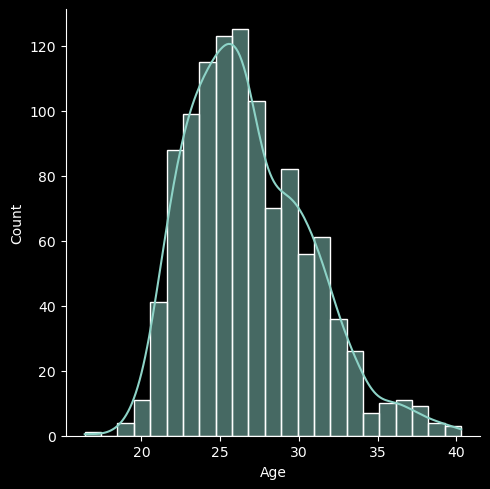

In [ ]:
# Age distribution - 100 m Women
age_dist = data['Age'][data.Gender == 'Women'].loc[data.Event == '100 m']

graph_age = sns.displot(age_dist, kde=True)

In [ ]:
from scipy.stats import norm

mu, std = norm.fit(age_dist)
print(mu,std)

#where mu is the mean and std is the standard deviation

26.757972350230418 3.8583183867365114


In [ ]:
event = data.loc[data.Event=='100 m']
event.head()

,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event,Age
4000,1,10.49,Florence Griffith-Joyner,USA,1959-12-21,1.0,Indianapolis,1988-07-16,Women,100 m,28.6
4001,2,10.61,Florence Griffith-Joyner,USA,1959-12-21,1.0,Indianapolis,1988-07-17,Women,100 m,28.6
4002,3,10.62,Florence Griffith-Joyner,USA,1959-12-21,1.0,Seoul,1988-09-24,Women,100 m,28.8
4003,4,10.64,Carmelita Jeter,USA,1979-11-24,1.0,Shanghai,2009-09-20,Women,100 m,29.8
4004,5,10.65,Marion Jones,USA,1975-10-12,1.0,Johannesburg,1998-09-12,Women,100 m,22.9


<AxesSubplot:xlabel='Date', ylabel='Time'>

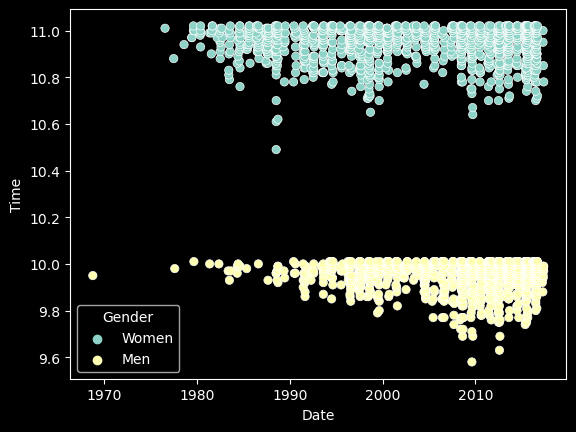

In [ ]:
sns.scatterplot(x=event['Date'], y=event['Time'], hue='Gender', data=event)

the stats for this fit are: r_value: -0.11765249201225483 slope: -0.0009338756672315689 intercept: 11.818848218433747


C:\Users\nj834\AppData\Local\Temp\ipykernel_4140\3551681484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_men['Year']=event_men['Date'].dt.year


Text(0.5, 1.0, 'Male 100 m Times')

<Figure size 640x480 with 0 Axes>

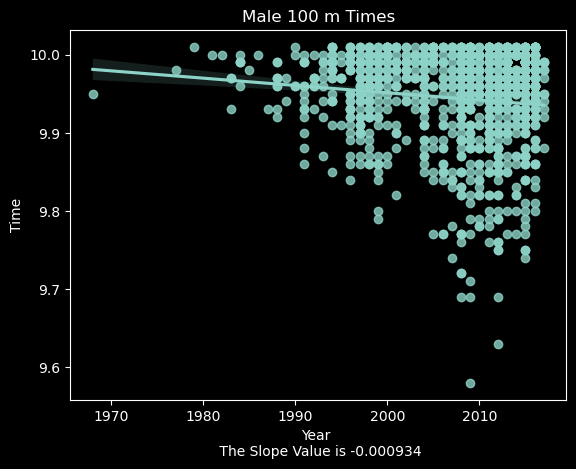

In [ ]:
def get_my_stats(x,y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    plt.figure()
    fig, ax = plt.subplots()
    sns.regplot(x=x,y=y)
    plt.xlabel('Year \n The Slope Value is %.6f' %slope)
    print('the stats for this fit are:', 'r_value:',r_value, 'slope:',slope, 'intercept:', intercept)

event_men = event.loc[event['Gender']=='Men']
event_men['Year']=event_men['Date'].dt.year
#print(marathon_men.head())
get_my_stats(event_men['Year'],event_men['Time'])
plt.title('Male 100 m Times')

the stats for this fit are: r_value: -0.04368670106774962 slope: -0.00031289132926939033 intercept: 11.563069705551504


C:\Users\nj834\AppData\Local\Temp\ipykernel_4140\829391048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event_women['Year']=event_women['Date'].dt.year


Text(0.5, 1.0, 'Female 100 m Times')

<Figure size 640x480 with 0 Axes>

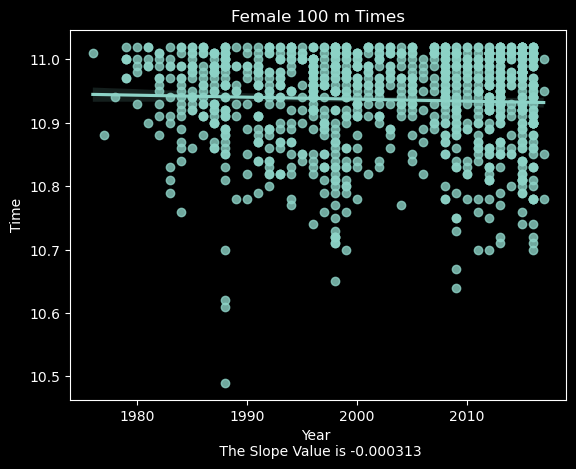

In [ ]:
event_women = event[event['Gender']=='Women']
event_women['Year']=event_women['Date'].dt.year
#print(marathon_men.head())
get_my_stats(event_women['Year'],event_women['Time'])
plt.title('Female 100 m Times')

Analysing the fastest overall times each year and determining if they are increasing or decreasing:

In [ ]:
event = data.loc[data.Event=='100 m']
event.head()

,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event,Age
4000,1,10.49,Florence Griffith-Joyner,USA,1959-12-21,1.0,Indianapolis,1988-07-16,Women,100 m,28.6
4001,2,10.61,Florence Griffith-Joyner,USA,1959-12-21,1.0,Indianapolis,1988-07-17,Women,100 m,28.6
4002,3,10.62,Florence Griffith-Joyner,USA,1959-12-21,1.0,Seoul,1988-09-24,Women,100 m,28.8
4003,4,10.64,Carmelita Jeter,USA,1979-11-24,1.0,Shanghai,2009-09-20,Women,100 m,29.8
4004,5,10.65,Marion Jones,USA,1975-10-12,1.0,Johannesburg,1998-09-12,Women,100 m,22.9


In [ ]:
#medals_m = data[data.Event == '100 m'].loc[data.Place <= 3.0].groupby(['Time'], as_index=False).size()
#print(medals_m)

In [ ]:
# Times in the 100 m event
get_year = data[data.Event == '100 m']['Date'].dt.year

# Times per year
get_year_time = get_year.value_counts()
get_year_time.head()

2015    190
2016    152
2012    138
2013    131
2008    109
Name: Date, dtype: int64

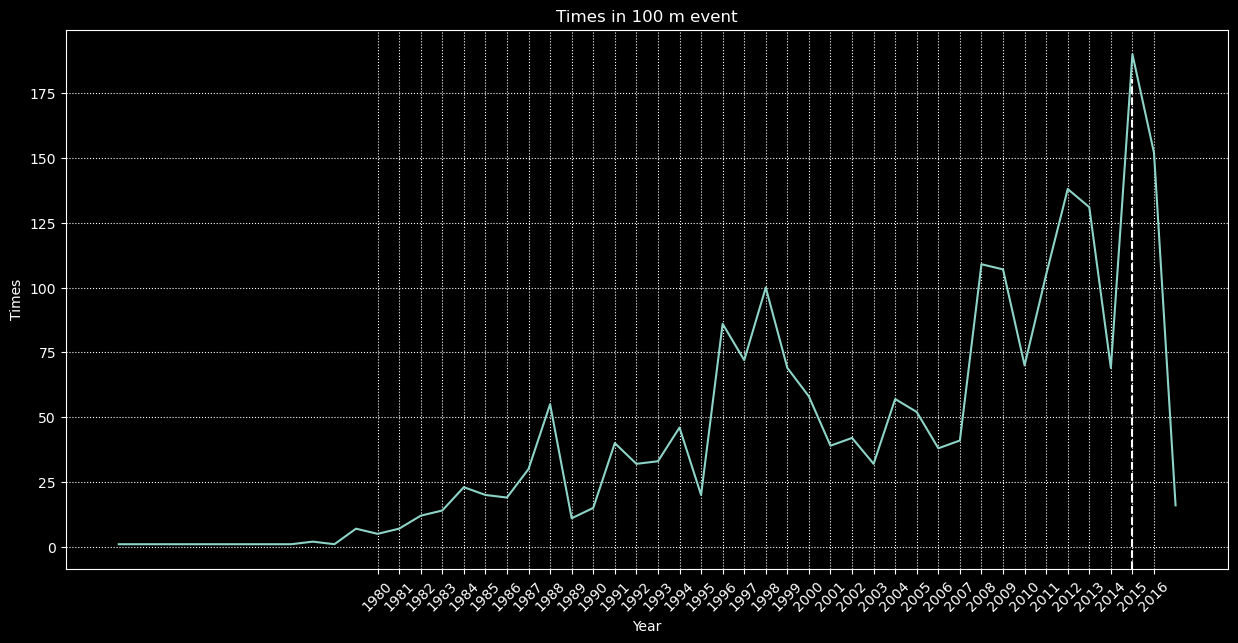

In [ ]:
def times():
    get_year_time.sort_index().plot(figsize=(15, 7))
    plt.title('Times in 100 m event')
    plt.xlabel('Year')
    plt.ylabel('Times')
    plt.grid(ls = 'dotted')
    plt.style.use('dark_background')
    plt.xticks(range(1980,2017),rotation=45)
    plt.axvline(get_year_time.idxmax(), ls='dashed',ymax=1/1.1)
    plt.show()
times()